Descriptive Statistics:
                 Age  Gender  Sleep_Duration  Stress_Level       Diet_Type  \
count   80000.000000   80000    80000.000000  80000.000000           80000   
unique           NaN       3             NaN           NaN               3   
top              NaN  Female             NaN           NaN  Non-Vegetarian   
freq             NaN   38404             NaN           NaN           47986   
mean       38.525525     NaN        7.005332      5.493762             NaN   
std        12.101876     NaN        1.734435      2.865308             NaN   
min        18.000000     NaN        4.000000      1.000000             NaN   
25%        28.000000     NaN        5.500000      3.000000             NaN   
50%        39.000000     NaN        7.000000      5.000000             NaN   
75%        49.000000     NaN        8.500000      8.000000             NaN   
max        59.000000     NaN       10.000000     10.000000             NaN   

        Daily_Screen_Time Exercise_Freq

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

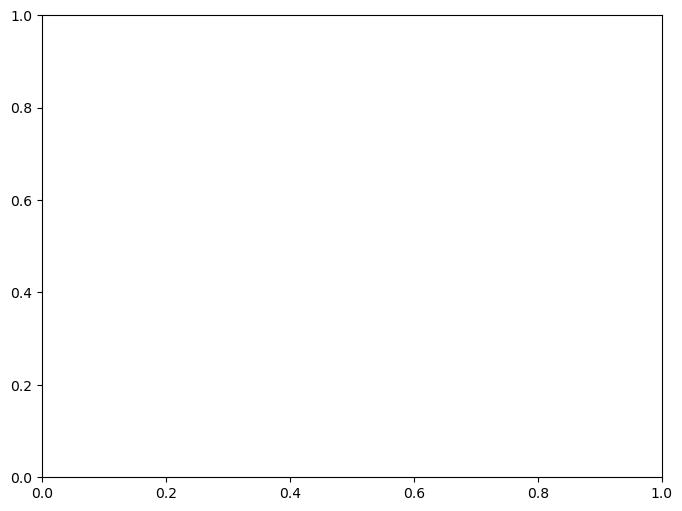

In [4]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier



# Load the CSV file
data = pd.read_csv('finaldata.csv')

# Drop unnecessary columns
data = data.drop(['AI_Predicted_Score', 'User_ID'], axis=1)

# Display descriptive statistics
print("Descriptive Statistics:")
print(data.describe(include='all'))

# Display missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display unique values in the 'Diet_Type' column
if 'Diet_Type' in data.columns:
    print("\nUnique values in 'Diet_Type':")
    print(data['Diet_Type'].unique())
else:
    print("\nColumn 'Diet_Type' not found in the dataset.")

# Display unique values in the 'Gender' column
if 'Gender' in data.columns:
    print("\nUnique values in 'Gender':")
    print(data['Gender'].unique())
else:
    print("\nColumn 'Gender' not found in the dataset.")

# Display unique values in the 'Exercise_Frequency' column
if 'Exercise_Frequency' in data.columns:
    print("\nUnique values in 'Exercise_Frequency':")
    print(data['Exercise_Frequency'].unique())
else:
    print("\nColumn 'Exercise_Frequency' not found in the dataset.")

# Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, hue='Gender', palette='viridis', legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of Diet_Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Diet_Type', data=data, hue='Diet_Type', palette='viridis', legend=False)
plt.title('Distribution of Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

# Distribution of Exercise_Frequency
plt.figure(figsize=(8, 6))
sns.countplot(x='Exercise_Frequency', data=data, hue='Exercise_Frequency', palette='viridis', legend=False)
plt.title('Distribution of Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')
plt.show()

# Boxplot of cognitive score by stress level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level', y='Cognitive_Score', data=data)
plt.title('Cognitive Score by Stress Level')
plt.show()

# Boxplot of cognitive score by exercise level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exercise_Frequency', y='Cognitive_Score', data=data)
plt.title('Cognitive Score by Exercise Frequency')
plt.show()

# Encode categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Diet_Type'] = encoder.fit_transform(data['Diet_Type'])
data['Exercise_Frequency'] = encoder.fit_transform(data['Exercise_Frequency'])

# Correlation heatmap
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Scatter plot of Reaction Time vs Cognitive Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reaction_Time', y='Cognitive_Score', data=data, hue='Cognitive_Score', palette='viridis')
plt.title('Reaction Time vs Cognitive Score')
plt.xlabel('Reaction Time')
plt.ylabel('Cognitive Score')
plt.show()

# Scatter plot of Memory Test Score vs Cognitive Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Memory_Test_Score', y='Cognitive_Score', data=data, hue='Cognitive_Score', palette='viridis')
plt.title('Memory Test Score vs Cognitive Score')
plt.xlabel('Memory Test Score')
plt.ylabel('Cognitive Score')
plt.legend(loc='upper right')  # Move legend to the top-right corner
plt.show()

# Scatter plot of Daily Screen Time vs Cognitive Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Daily_Screen_Time', y='Cognitive_Score', data=data, hue='Cognitive_Score', palette='viridis')
plt.title('Daily Screen Time vs Cognitive Score')
plt.xlabel('Daily Screen Time')
plt.ylabel('Cognitive Score')
plt.legend(loc='upper right')  # Move legend to the top-right corner
plt.show()

# Check for missing values in Cognitive_Score
print("\nChecking for missing values in 'Cognitive_Score':")
print(data['Cognitive_Score'].isnull().sum())

# Drop rows with missing Cognitive_Score values
data = data.dropna(subset=['Cognitive_Score'])

# Split cognitive score into levels
bins = [data['Cognitive_Score'].min(), 33, 66, data['Cognitive_Score'].max()]
labels = ['Low', 'Medium', 'High']
data['Cognitive_Level'] = pd.cut(data['Cognitive_Score'], bins=bins, labels=labels)

# Ensure no NaN values in the target variable
print("\nChecking for missing values in 'Cognitive_Level':")
print(data['Cognitive_Level'].isnull().sum())

# Drop rows with missing Cognitive_Level values (if any)
data = data.dropna(subset=['Cognitive_Level'])

# Split the data into features and target
X = data.drop(['Cognitive_Score', 'Cognitive_Level'], axis=1)
y = data['Cognitive_Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values in the training and testing sets
print("\nChecking for missing values in training and testing sets:")
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), y_train.isnull().sum(), y_test.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the target variable (Cognitive_Level) into numeric values
y_train_encoded = y_train.map({'Low': 0, 'Medium': 1, 'High': 2})
y_test_encoded = y_test.map({'Low': 0, 'Medium': 1, 'High': 2})

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42),  # Removed use_label_encoder
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)  # Added KNN with 5 neighbors
}

# Train and evaluate models
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train_encoded)  # Use encoded target variable
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)  # Compare with encoded target variable
    report = classification_report(y_test_encoded, y_pred, output_dict=True)
    results.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 2),
        'Precision': round(report['weighted avg']['precision'], 2),
        'Recall': round(report['weighted avg']['recall'], 2),
        'F1-Score': round(report['weighted avg']['f1-score'], 2)
    })

# Create a results DataFrame
results_df = pd.DataFrame(results)

# Print the evaluation metrics table
print("\nEvaluation Metrics:")
print(results_df)

# Display the evaluation metrics table as a plot
plt.figure(figsize=(10, 4))
plt.axis('off')
table = plt.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_df.columns))))
plt.title("Evaluation Metrics", fontsize=14, pad=20)
plt.show()
